In [416]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

file_path = "data/svbr.csv"

def extract_data(file_path: str) -> tuple[np.ndarray, np.ndarray]:
  df = pd.read_csv(file_path, delimiter=";")
  x = df.iloc[:,:-1].values
  y = df.iloc[:,-1].values
  return x, y

# Imputando dados faltantes
def impute_data(X: np.ndarray) -> np.ndarray:
  imputer = SimpleImputer(missing_values=np.nan, strategy='median')
  X[:,1:] = imputer.fit_transform(X[:, 1:])  # Impute only numerical columns
  return X


In [417]:
#Computando os rotulos para variaveis categoricas
from numpy import ndarray


def one_hot_encode_categorical_data(X: ndarray) -> ndarray:
  D = pd.get_dummies(X[:, 0])
  X = np.insert(X[:, 1:], 0, D.values, axis=1)
  return X

In [418]:
#Sepaarando conjunto de dados de treino e teste
from sklearn.model_selection import train_test_split

def split_train_data(X: ndarray, y: ndarray, subscriptions: int, visualizations: int, test_size: float) -> list:
    return train_test_split(X, y, subscriptions, visualizations, test_size=test_size)

In [419]:
from sklearn.preprocessing import StandardScaler

# Computando a normalização dos dados
def normalize_data(XTrain: ndarray, XTest: ndarray) -> tuple[ndarray, ndarray]:
  scaler = StandardScaler()
  XTrain = scaler.fit_transform(XTrain)
  XTest = scaler.fit_transform(XTest)
  return XTrain, XTest

In [420]:
from sklearn.linear_model import LinearRegression

def linear_regression(Xtrain, Xtest, YTrain):
  model = LinearRegression()
  model.fit(Xtrain, YTrain)
  predictions = model.predict(Xtest)
  return predictions

In [421]:
from matplotlib import pyplot as plt
def make_graphic(subsTest, Ytest, predictions):
  plt.scatter(subsTest, Ytest, color="red")
  plt.plot(subsTest, predictions, color="blue")
  plt.title("Subscriptions VS Visualizations")
  plt.xlabel("Subscriptions")
  plt.ylabel("Visualizations")
  plt.show()

In [ ]:
def main():
  dataX, dataY = extract_data(file_path)
  subscriptions = dataX[:, 1]
  imputedX = impute_data(dataX,)
  encodedX = one_hot_encode_categorical_data(imputedX)
  XTrain, XTest, yTrain, yTest, subsTrain, subsTest  = split_train_data(
    encodedX, 
    dataY, 
    subscriptions, 
    test_size=0.8
  )
  XTrain, XTest = normalize_data(XTrain, XTest)
  predictions = linear_regression(XTrain, XTest, yTrain)
  make_graphic(subsTest, yTest, predictions)

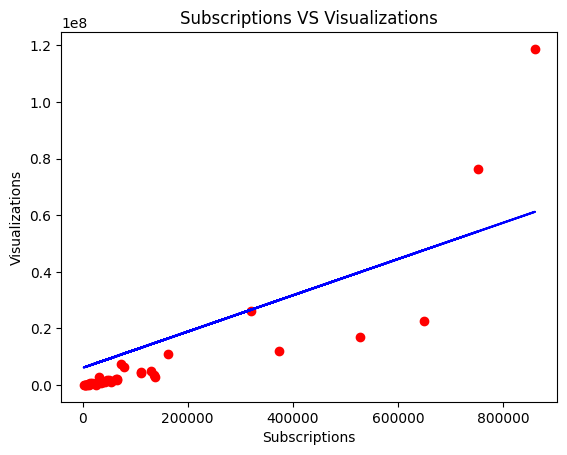

In [431]:
main()